Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

## Strojno učenje 2016./2017.

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

### Laboratorijska vježba 3: Stroj potpornih vektora i algoritam k-najbližih susjeda

(c) 2015-2016 Jan Šnajder, Domagoj Alagić

<i>Verzija: 0.2</i> <br/>
<i>Zadnji put ažurirano: 9. studenog 2016.</i> 

Objavljeno: **9. studenog 2016.**<br>
Rok za predaju: U terminu vježbe u tjednu od **14. studenog 2016.**

### Upute

Treća laboratorijska vježba sastoji se od sedam zadataka. Kako bi kvalitetnije, ali i na manje zamoran način usvojili gradivo ovog kolegija, potrudili smo se uključiti tri vrste zadataka: **1)** implementacija manjih algoritama, modela ili postupaka; **2)** eksperimenti s raznim modelima te njihovim hiperparametrima, te **3)** primjena modela na (stvarnim) podatcima. Ovim zadatcima pokrivamo dvije paradigme učenja: učenje izgradnjom (engl. *learning by building*) i učenje eksperimentiranjem (engl. *learning by experimenting*).

U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Klasifikator SVM

#### (a)

Upoznajte se s klasom [`svm.SVC`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), koja ustvari implementira sučelje prema implementaciji [`libsvm`](http://www.csie.ntu.edu.tw/~cjlin/libsvm/). Primijenite model `SVC` s linearnom jezgrenom funkcijom (tj. bez preslikavanja primjera u prostor značajki) na skup podataka `seven` (dan niže) s $N=7$ primjera. Ispišite koeficijente $w_0$ i $\mathbf{w}$. Ispišite dualne koeficijente i potporne vektore. Završno, koristeći funkciju `mlutils.plot_2d_svc_problem` iscrtajte podatke, decizijsku granicu i marginu. Funkcija prima podatke, oznake i klasifikator (objekt klase `SVC`). Izračunajte širinu margine.

[[ -9.99707031e-01  -2.92968750e-04]]
[ 3.99951172]
[[ -4.99707031e-01  -1.46484375e-04   4.99853516e-01]]
[[ 5.  2.]
 [ 5.  4.]
 [ 3.  2.]]
2.00058602331


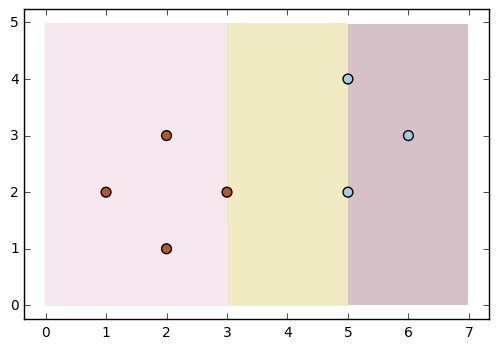

In [2]:
from sklearn.svm import SVC

seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, -1, -1, -1])

svc = SVC(kernel = 'linear')
svc.fit(seven_X, seven_y)
mlutils.plot_2d_svc_problem(seven_X, seven_y, svc)

print svc.coef_
print svc.intercept_

print svc.dual_coef_
print svc.support_vectors_

print 2/linalg.norm(svc.coef_)

**Q:** Koliko iznosi širina margine? <br>
**Q:** Koji primjeri su potporni vektori i zašto?

#### (b)

Definirajte funkciju `hinge(model, x, y)` koja izračunava gubitak zglobnice modela SVM (s linearnom jezgrom) na primjeru `x`. Izračunajte gubitke modela naučenog na skupu `seven` za primjere $\mathbf{x}^{(2)}=(3,2)$ i $\mathbf{x}^{(1)}=(3.5,2)$ koji su označeni pozitivno ($y=1$) te za $\mathbf{x}^{(3)}=(4,2)$ koji je označen negativno ($y=-1$). Također, izračunajte prosječni gubitak SVM-a na skupu `seven`. Uvjerite se da je rezultat identičan onome koji biste dobili primjenom ugrađene funkcije [`metrics.hinge_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.hinge_loss.html).

In [3]:
from sklearn.metrics import hinge_loss

def hinge(model, x, y):
    return max(0.0, 1.0 - model.predict([x]) * y)

test_X = np.array([[3,2], [3.5,2], [4,2]])
test_y = np.array([1, 1, -1])

for i in xrange(len(test_X)):
    print hinge(svc, test_X[i], test_y[i])

s = 0.0
for i in xrange(len(seven_X)):
    s += hinge(svc, seven_X[i], seven_y[i])

print s/len(seven_X)

print hinge_loss(seven_y, svc.predict(seven_X))

0.0
0.0
[ 2.]
0.0
0.0


#### (c)

Vratit ćemo se na skupove podataka `outlier` ($N=8$) i `unsep` ($N=8$) iz prošle laboratorijske vježbe (dani niže) i pogledati kako se model SVM-a nosi s njima. Naučite ugrađeni model SVM-a (s linearnom jezgrom) na ovim podatcima i iscrtajte decizijsku granicu (skupa s marginom). Također ispišite točnost modela korištenjem funkcije [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

1.0


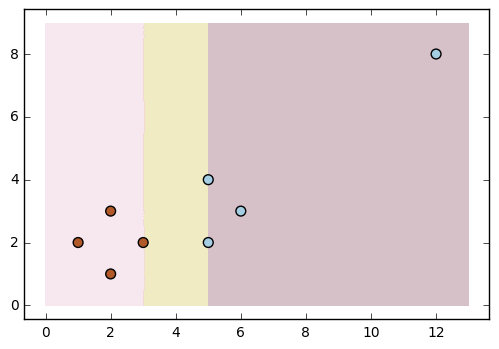

In [4]:
from sklearn.metrics import accuracy_score

outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, -1)

unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, -1)

svc1 = SVC(kernel = 'linear')
svc1.fit(outlier_X, outlier_y)
mlutils.plot_2d_svc_problem(outlier_X, outlier_y, svc1)

predicted1 = svc1.predict(outlier_X)
print accuracy_score(outlier_y, predicted1, normalize=True)

0.875
7


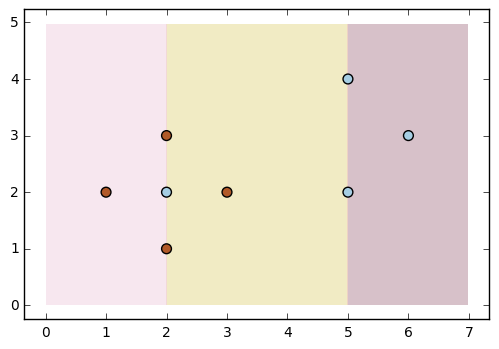

In [5]:
svc2 = SVC(kernel = 'linear')
svc2.fit(unsep_X, unsep_y)
mlutils.plot_2d_svc_problem(unsep_X, unsep_y, svc2)

predicted2 = svc2.predict(unsep_X)
print accuracy_score(unsep_y, predicted2, normalize=True)
print accuracy_score(unsep_y, predicted2, normalize=False)

**Q:** Zašto stršeća vrijednost ne utječe na SVM? <br>
**Q:** Kako se linearan SVM nosi s linearno neodvojivim skupom podataka? <br>
**Q:** Zašto SVM ipak uspjeva pronaći nekakvu granicu kod linearno neodvojivog problema, iako koristimo linearnu jezgru?

### 2. Nelinearan SVM

Ovaj zadatak pokazat će kako odabir jezgre utječe na kapacitet SVM-a. Na skupu `unsep` iz prošlog zadatka trenirajte tri modela SVM s različitim jezgrenim funkcijama: linearnom, polinomijalnom i radijalnom baznom (RBF) funkcijom. Varirajte parametar $C$ po vrijednostima $C\in\{10^{-2},1,10^2\}$, dok za ostale parametre (stupanj polinoma za polinomijalnu jezgru odnosno parametar $\gamma$ za jezgru RBF) koristite podrazumijevane vijednosti. Prikažite granice između klasa (i margine) na grafikonu organiziranome u polje $3x3$, gdje su stupci različite jezgre, a retci različite vrijednosti parametra $C$.

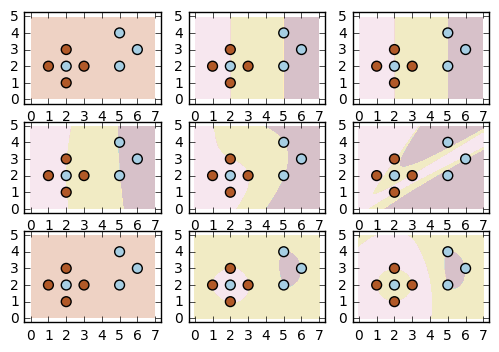

In [6]:
svc_lin1 = SVC(C = 0.01,kernel = 'linear')
svc_lin2 = SVC(kernel = 'linear')
svc_lin3 = SVC(C = 100, kernel = 'linear')

svc_poly1 = SVC(C = 0.01,kernel = 'poly')
svc_poly2 = SVC(kernel = 'poly')
svc_poly3 = SVC(C = 100, kernel = 'poly')

svc_rbf1 = SVC(C = 0.01)
svc_rbf2 = SVC()
svc_rbf3 = SVC(C = 100)

svc_lin1.fit(unsep_X, unsep_y)
svc_lin2.fit(unsep_X, unsep_y)
svc_lin3.fit(unsep_X, unsep_y)

svc_poly1.fit(unsep_X, unsep_y)
svc_poly2.fit(unsep_X, unsep_y)
svc_poly3.fit(unsep_X, unsep_y)

svc_rbf1.fit(unsep_X, unsep_y)
svc_rbf2.fit(unsep_X, unsep_y)
svc_rbf3.fit(unsep_X, unsep_y)

fig = plt.figure()
fig.add_subplot(331)   #top left
mlutils.plot_2d_svc_problem(unsep_X, unsep_y, svc_lin1)
fig.add_subplot(332)   #top center
mlutils.plot_2d_svc_problem(unsep_X, unsep_y, svc_lin2)
fig.add_subplot(333)   #top right
mlutils.plot_2d_svc_problem(unsep_X, unsep_y, svc_lin3)
fig.add_subplot(334)   #center left
mlutils.plot_2d_svc_problem(unsep_X, unsep_y, svc_poly1)
fig.add_subplot(335)   #center
mlutils.plot_2d_svc_problem(unsep_X, unsep_y, svc_poly2)
fig.add_subplot(336)   #center right
mlutils.plot_2d_svc_problem(unsep_X, unsep_y, svc_poly3)
fig.add_subplot(337)   #bottom left
mlutils.plot_2d_svc_problem(unsep_X, unsep_y, svc_rbf1)
fig.add_subplot(338)   #bottom center
mlutils.plot_2d_svc_problem(unsep_X, unsep_y, svc_rbf2)
fig.add_subplot(339)   #bottom right
mlutils.plot_2d_svc_problem(unsep_X, unsep_y, svc_rbf3)

### 3. Optimizacija hiperparametara SVM-a

Pored hiperparametra $C$, model SVM s jezgrenom funkcijom RBF ima i dodatni hiperparametar $\gamma=\frac{1}{2\sigma^2}$ (preciznost). Taj parametar također određuje složenost modela: velika vrijednost za $\gamma$ znači da će RBF biti uska, primjeri će biti preslikani u prostor u kojem su (prema skalarnome produktu) međusobno vrlo različiti, što će rezultirati složenijim modelima. Obrnuto, mala vrijednost za $\gamma$ znači da će RBF biti široka, primjeri će biti međusobno sličniji, što će rezultirati jednostavnijim modelima. To ujedno znači da, ako odabremo veći $\gamma$, trebamo jače regularizirati model, tj. trebamo odabrati manji $C$, kako bismo spriječili prenaučenost. Zbog toga je potrebno zajednički optimirati hiperparametre $C$ i $\gamma$, što se tipično radi iscrpnim pretraživanjem po rešetci (engl. *grid search*). Ovakav pristup primjenjuje se kod svih modela koji sadrže više od jednog hiperparametra.


#### (a)

Definirajte funkciju 

> `grid_search(X_train, X_validate, y_train, y_validate, (c1,c2), (g1,g2), error_surface=False)` 

koja optimizira parametre $C$ i $\gamma$ pretraživanjem po rešetci. Funkcija treba pretražiti parametre $C\in\{2^{c_1},2^{c_1+1},\dots,2^{c_2}\}$ i $\gamma\in\{2^{g_1},2^{g_1+1},\dots,2^{g_2}\}$. Funkcija treba vratiti optimalne parametre $(C^*,\gamma^*)$, tj. one za koje na skupu za provjeru model ostvaruju najmanju pogrešku. Dodatno, ako je `surface=True`, funkcija treba vratiti matrice (tipa `ndarray`) pogreške modela (očekivanje gubitka 0-1) na skupu za učenje i skupu za provjeru. Svaka je matrica dimenzija $(c_2-c_1+1)\times(g_2-g_1+1)$ (retci odgovaraju različitim vrijednostima za $C$, a stupci različitim vrijednostima za $\gamma$).

In [7]:
from sklearn.metrics import accuracy_score, zero_one_loss

def grid_search(X_train, X_validate, y_train, y_validate, (c1,c2), (g1,g2), error_surface=False) :
    crange = []
    gammarange = []

    for i in range(c1, c2+1):
        crange.append(2**i)

    for i in range(g1, g2+1):
        gammarange.append(2**i)     

    if error_surface:
        e_train = np.ndarray(shape=(c2-c1+1,g2-g1+1), dtype=float)
        e_validate = np.ndarray(shape=(c2-c1+1,g2-g1+1), dtype=float)

    minc = crange[0]
    mingamma = gammarange[0]

    svm = SVC(C = minc, gamma = mingamma)
    svm.fit(X_train, y_train)
    
    minerror = 0
    for i in xrange(len(X_validate)):
        minerror += hinge(svc, X_validate[i], y_validate[i])
    minerror -= 1/(2*minc*(linalg.norm(svc.coef_)**2))

    if error_surface:
        predicted1 = svm.predict(X_train)
        predicted2 = svm.predict(X_validate)
        e_train[0][0] = zero_one_loss(y_train, predicted1)
        e_validate[0][0] = zero_one_loss(y_validate, predicted2)

    for i in xrange(len(crange)):
        for j in xrange(len(gammarange)):

            tempc = crange[i]
            tempgamma = gammarange[j]

            svm = SVC(C = tempc, gamma = tempgamma)
            svm.fit(X_train, y_train)

            temperror = 0
            for k in xrange(len(X_validate)):
                temperror += hinge(svc, X_validate[k], y_validate[k])
            temperror -= 1/(2*minc*(linalg.norm(svc.coef_)**2))

            if error_surface:
                predicted1 = svm.predict(X_train)
                predicted2 = svm.predict(X_validate)
                e_train[i][j] = zero_one_loss(y_train, predicted1)
                e_validate[i][j] = zero_one_loss(y_validate, predicted2)

            if temperror < minerror:
                minerror = temperror
                minc = tempc
                mingamma = tempgamma

    if error_surface:
        return (minc, mingamma,e_train, e_validate)
    return (minc, mingamma)

#### (b)

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte **dva** skupa podataka od $N=200$ primjera: jedan s $n=2$ dimenzije i drugi s $n=1000$ dimenzija. Primjeri neka dolaze iz dviju klasa, s time da svakoj klasi odgovaraju dvije grupe (`n_clusters_per_class=2`), kako bi problem bio nešto složeniji, tj. nelinearniji. Neka sve značajke budu informativne. Podijelite skup primjera na skup za učenje i skup za ispitivanje u omjeru 1:1.

Na oba skupa optimirajte SVM s jezgrenom funkcijom RBF, u rešetci $C\in\{2^{-5},2^{-4},\dots,2^{15}\}$ i $\gamma\in\{2^{-15},2^{-14},\dots,2^{3}\}$. Prikažite površinu pogreške modela na skupu za učenje i skupu za provjeru, i to na oba skupa podataka (ukupno četiri grafikona) te ispišite optimalne kombinacije hiperparametara. Prikažite i granicu između klasa za dvodimenzijski skup. Za prikaz površine pogreške modela možete koristiti funkciju `plot_error_surface` iz paketa `mlutils`.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split

X1, y1 = make_classification(n_samples=200,n_features=2,n_classes=2,n_informative=2,n_redundant=0,n_clusters_per_class=2)
X2, y2 = make_classification(n_samples=200,n_features=1000,n_classes=2,n_informative=1000, n_redundant=0,n_clusters_per_class=2)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.5)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.5)

c1 = -5
c2 = 15
g1 = -15
g2 = 3

fig = plt.figure()

(minc1, mingamma1, err1_train, err1_test) = grid_search(X1_train, X1_test, y1_train, y1_test, (c1,c2), (g1,g2), error_surface=True)
print 'C1* = ' + str(minc1) + ', gamma1* = ' + str(mingamma1)

fig.add_subplot(221)   #top left
mlutils.plot_error_surface(err1_train,(c1,c2),(g1,g2))
fig.add_subplot(222)   #top right
mlutils.plot_error_surface(err1_test,(c1,c2),(g1,g2))

(minc2, mingamma2, err2_train, err2_test) = grid_search(X2_train, X2_test, y2_train, y2_test, (c1,c2), (g1,g2), error_surface=True)
print 'C2* = ' + str(minc2) + ', gamma2* = ' + str(mingamma2)

fig.add_subplot(223)   #bottom left
mlutils.plot_error_surface(err2_train,(c1,c2),(g1,g2))
fig.add_subplot(224)   #bottom right
mlutils.plot_error_surface(err2_test,(c1,c2),(g1,g2))

**Q:** Razlikuje li se površina pogreške na skupu za učenje i skupu za ispitivanje? Zašto? <br>
**Q:** U prikazu površine pogreške, koji dio površine odgovara prenaučenosti, a koji podnaučenosti? Zašto? <br>
**Q:** Kako broj dimenzija $n$ utječe na površinu pogreške, odnosno na optimalne hiperparametre $(C^*, \gamma^*)$? <br>
**Q:** Preporuka je da povećanje vrijednosti za $\gamma$ treba biti popraćeno smanjenjem vrijednosti za $C$. Govore li vaši rezultati u prilog toj preporuci? Obrazložite. <br>
**Q:** Podrazumijevana vrijednost parametara je $C=1$ i $\gamma=1/n$. Bi li te vrijednosti bile optimalne u ovom slučaju?

### 4. Utjecaj standardizacije značajki kod SVM-a

Za mnoge je modele bitno prije treniranja skalirati značajke, kako bi se spriječilo da značajke s većim numeričkim rasponima dominiraju nad onima s manjim numeričkim rasponima. To vrijedi i za SVM, kod kojega skaliranje nerijetko može znatno poboljšati rezultate. Svrha ovog zadataka jest eksperimentalno utvrditi utjecaj skaliranja značajki na točnost SVM-a.

Generirat ćemo dvoklasni skup od $N=500$ primjera s $n=2$ značajke, tako da je dimenzija $x_1$ većeg iznosa i većeg raspona od dimenzije $x_0$, te ćemo dodati jedan primjer koji vrijednošću značajke $x_1$ odskače od ostalih primjera:

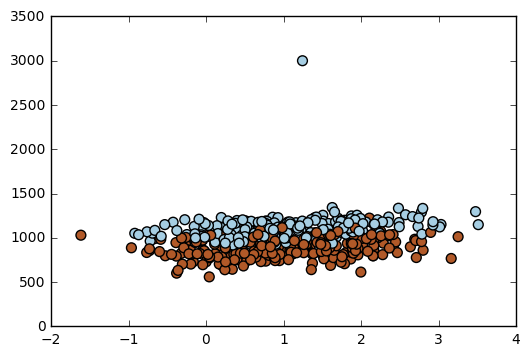

In [9]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500,n_features=2,n_classes=2,n_redundant=0,n_clusters_per_class=1)
X[:,1] = X[:,1]*100+1000
X[0,1] = 3000

mlutils.plot_2d_svc_problem(X, y)

#### (a)

Proučite funkciju za iscrtavanje histograma [`hist`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist). Prikažite histograme vrijednosti značajki $x_0$ i $x_1$ (ovdje i u sljedećim zadatcima koristite `bins=50`).

(array([  2.,   5.,   7.,  15.,  24.,  42.,  37.,  45.,  46.,  67.,  71.,
         55.,  49.,  24.,   5.,   4.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  559.58697655,   608.39523702,   657.20349749,   706.01175796,
          754.82001843,   803.6282789 ,   852.43653937,   901.24479984,
          950.0530603 ,   998.86132077,  1047.66958124,  1096.47784171,
         1145.28610218,  1194.09436265,  1242.90262312,  1291.71088359,
         1340.51914406,  1389.32740452,  1438.13566499,  1486.94392546,
         1535.75218593,  1584.5604464 ,  1633.36870687,  1682.17696734,
         1730.98522781,  1779.79348828,  1828.60174875,  1877.41000921,
         1926.21826968,  1975.02653015,  2023.83479062,  2072.64305109,
         2121.45131156,  2170.25957203,  2219.0678325 ,  2267.87609297,
         2

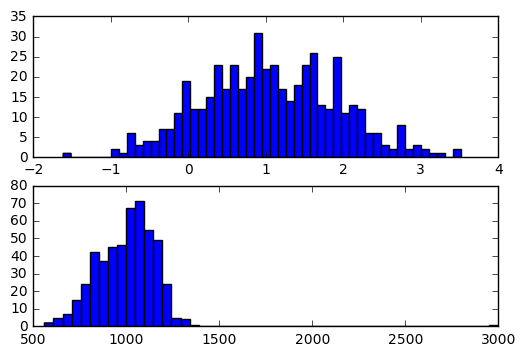

In [10]:
fig = plt.figure()
fig.add_subplot(211)
plt.hist(X[:,0], bins=50)
fig.add_subplot(212)
plt.hist(X[:,1], bins=50)

#### (b)

Proučite razred [`preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). Prikažite histograme vrijednosti značajki $x_0$ i $x_1$ ako su iste skalirane min-max skaliranjem (ukupno dva histograma).

(array([  2.,   5.,   7.,  15.,  24.,  42.,  37.,  45.,  46.,  67.,  71.,
         55.,  49.,  24.,   5.,   4.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,
         0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,
         0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ,  0.52,
         0.54,  0.56,  0.58,  0.6 ,  0.62,  0.64,  0.66,  0.68,  0.7 ,
         0.72,  0.74,  0.76,  0.78,  0.8 ,  0.82,  0.84,  0.86,  0.88,
         0.9 ,  0.92,  0.94,  0.96,  0.98,  1.  ]),
 <a list of 50 Patch objects>)

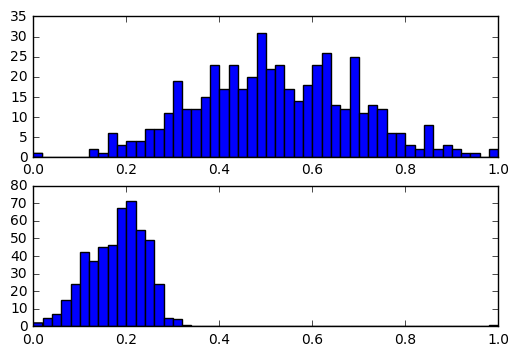

In [11]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_scaledMMS = mms.fit_transform(X)

fig = plt.figure()
fig.add_subplot(211)
plt.hist(X_scaledMMS[:,0], bins=50)
fig.add_subplot(212)
plt.hist(X_scaledMMS[:,1], bins=50)

**Q:** Kako radi ovo skaliranje? <br>
**Q:** Dobiveni histogrami su vrlo slični. U čemu je razlika? <br>

#### (c)

Proučite razred [`preprocessing.StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Prikažite histograme vrijednosti značajki $x_0$ i $x_1$ ako su iste skalirane standardnim skaliranjem (ukupno dva histograma).

(array([  2.,   5.,   7.,  15.,  24.,  42.,  37.,  45.,  46.,  67.,  71.,
         55.,  49.,  24.,   5.,   4.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ -2.60073271,  -2.31466661,  -2.02860051,  -1.74253441,
         -1.45646831,  -1.17040221,  -0.88433611,  -0.59827002,
         -0.31220392,  -0.02613782,   0.25992828,   0.54599438,
          0.83206048,   1.11812658,   1.40419267,   1.69025877,
          1.97632487,   2.26239097,   2.54845707,   2.83452317,
          3.12058927,   3.40665536,   3.69272146,   3.97878756,
          4.26485366,   4.55091976,   4.83698586,   5.12305196,
          5.40911805,   5.69518415,   5.98125025,   6.26731635,
          6.55338245,   6.83944855,   7.12551465,   7.41158074,
          7.69764684,   7.98371294,   8.26977904,   8.55584514,
          8.841911

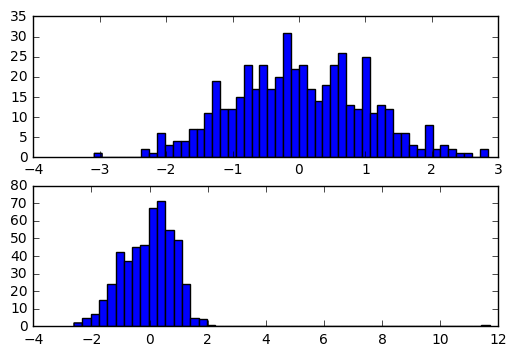

In [12]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_scaledSS = ss.fit_transform(X)

fig = plt.figure()
fig.add_subplot(211)
plt.hist(X_scaledSS[:,0], bins=50)
fig.add_subplot(212)
plt.hist(X_scaledSS[:,1], bins=50)

**Q:** Kako radi ovo skaliranje? <br>
**Q:** Dobiveni histogrami su vrlo slični. U čemu je razlika? <br>

#### (d)

Podijelite skup primjera na skup za učenje i skup za ispitivanje u omjeru 1:1. Trenirajte SVM s jezgrenom funkcijom RBF na skupu za učenje i ispitajte točnost modela na skupu za ispitivanje, koristeći tri varijante gornjeg skupa: neskalirane značajke, standardizirane značajke i min-max skaliranje. Koristite podrazumijevane vrijednosti za $C$ i $\gamma$. Izmjerite točnost svakog od triju modela na skupu za učenje i skupu za ispitivanje. Ponovite postupak više puta (npr. 30) te uprosječite rezultate (u svakom ponavljanju generirajte podatke kao što je dano na početku ovog zadatka).

**NB:** Na skupu za učenje treba najprije izračunati parametre skaliranja te zatim primijeniti skaliranje (funkcija `fit_transform`), dok na skupu za ispitivanje treba samo primijeniti skaliranje s parametrima koji su dobiveni na skupu za učenje (funkcija `transform`).

In [20]:
from sklearn.cross_validation import train_test_split

svc = SVC()
mms = MinMaxScaler()
ss = StandardScaler()

error_train = 0
error_train_mms = 0
error_train_ss = 0

error_test = 0
error_test_mms = 0
error_test_ss = 0

for i in xrange(31):
    
    X, y = make_classification(n_samples=500,n_features=2,n_classes=2,n_redundant=0,n_clusters_per_class=1)
    X[:,1] = X[:,1]*100+1000
    X[0,1] = 3000

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

    svc.fit(X_train, y_train)

    temperror = 0
    for i in xrange(len(X_train)):
        temperror += hinge(svc, X_train[i], y_train[i])
    temperror -= 1/(2*(linalg.norm(svc.coef_)**2))
    
    error_train += temperror
    
    temperror = 0
    for i in xrange(len(X_test)):
        temperror += hinge(svc, X_test[i], y_test[i])
    temperror -= 1/(2*(linalg.norm(svc.coef_)**2))
    
    error_test += temperror
    
    X_train_scaledMMS = mms.fit_transform(X_train)
    svc.fit_transform(X_train_scaledMMS, y_train)

    temperror = 0
    for i in xrange(len(X_train_scaledMMS)):
        temperror += hinge(svc, X_train_scaledMMS[i], y_train[i])
    temperror -= 1/(2*(linalg.norm(svc.coef_)**2))
    
    error_train_mms += temperror
    
    X_test_scaledMMS = mms.transform(X_test)
    predicted_MMS = svc.predict(X_test_scaledMMS)
    
    temperror = 0
    for i in xrange(len(X_test_scaledMMS)):
        temperror += hinge(svc, X_test_scaledMMS[i], predicted_MMS[i])
    temperror -= 1/(2*minc*(linalg.norm(svc.coef_)**2))
    
    error_test_mms += temperror
    
    X_train_scaledSS = ss.fit_transform(X_train)
    svc.fit_transform(X_train_scaledSS, y_train)

    temperror = 0
    for i in xrange(len(X_train_scaledSS)):
        temperror += hinge(svc, X_train_scaledSS[i], y_train[i])
    temperror -= 1/(2*(linalg.norm(svc.coef_)**2))
    
    error_train_ss += temperror
    
    X_test_scaledSS = mms.transform(X_test)
    predicted_SS = svc.predict(X_test_scaledSS)
    
    temperror = 0
    for i in xrange(len(X_test_scaledSS)):
        temperror += hinge(svc, X_test_scaledSS[i], predicted_SS[i])
    temperror -= 1/(2*(linalg.norm(svc.coef_)**2))
    
    error_test_ss += temperror
    

error_train /= 30
error_train_mms /= 30
error_train_ss /= 30

error_test /= 30
error_test_mms /= 30
error_test_ss /= 30    
    
    
    
    

ValueError: coef_ is only available when using a linear kernel

**Q:** Jesu li rezultati očekivani? Obrazložite. <br>
**Q:** Bi li bilo dobro kada bismo funkciju `fit_transform` primijenili na cijelom skupu podataka? Zašto? Bi li bilo dobro kada bismo tu funkciju primijenili zasebno na skupu za učenje i zasebno na skupu za ispitivanje? Zašto?

### 5. k-najbližih susjeda

U ovom zadatku promatrat ćemo jednostavan klasifikacijski model imena **algoritam k-najbližih susjeda**. Najprije ćete ga samostalno isprogramirati kako biste se detaljno upoznali s radom ovog modela, a zatim ćete prijeći na analizu njegovih hiperparametara (koristeći ugrađeni razred, zbog efikasnosti).

#### (a)

Implementirajte klasu `KNN` koja implementira algoritam $k$ najbližih susjeda. Neobavezan parametar konstruktora jest broj susjeda `n_neighbours` ($k$), čija je podrazumijevana vrijednost 3. Definirajte metode `fit(X, y)` i `predict(X)`, koje služe za učenje modela odnosno predikciju. Kao mjeru udaljenosti koristite euklidsku udaljenost ([`scipy.linalg.norm`](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.norm.html); pripazite na parametar `axis`). Nije potrebno implementirati nikakvu težinsku funkciju.

In [13]:
from scipy.linalg import norm
from bisect import insort

class KNN:
       
    def __init__(self, kp = 3):
        self.k = kp
    
    def udaljenost(self, x1, x2):
        suma = 0
        for i in range(0, len(x1)):
            suma = suma + (x1[i]-x2[i])**2
        suma = sqrt(suma)
        return suma
        
    def fit(self, Xp, yp):
        self.X = Xp
        self.y = yp
        self.K = len(unique(y))
        
    def predict(self, Xp):
        udaljenosti = list()
        knn = list()
        knny = list()
        
        for i in range(0,len(self.X)):
            udaljenosti.append( self.udaljenost(Xp, self.X[i]) )
        
        udaljenosti.sort()
            
        for i in range(0, self.k):
            for j in range(0,len(self.X)): 
                if ( self.udaljenost(Xp, self.X[j]) == udaljenosti[0] ):
                    knn.append(self.X[j])
                    knny.append(self.y[j])
                    udaljenosti.pop(0)
                    
        v = list()
        for i in range(0,self.K):
            suma = 0
            for j in range (0,len(knny)):
                if (knny[j]==i):
                    suma += 1
            v.append(suma)
            
        return v.index(max(v))

#### (b)

Kako biste se uvjerili da je Vaša implementacija ispravna, usporedite ju s ugrađenom implementacijom u razredu [`neighbors.KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Budući da spomenuti razred koristi razne optimizacijske trikove pri pronalasku najboljih susjeda, obavezno postavite parametar `algorithm=brute`, jer bi se u protivnom moglo dogoditi da Vam se predikcije razlikuju. Usporedite modele na sljedećem (umjetnom) skupu podataka:

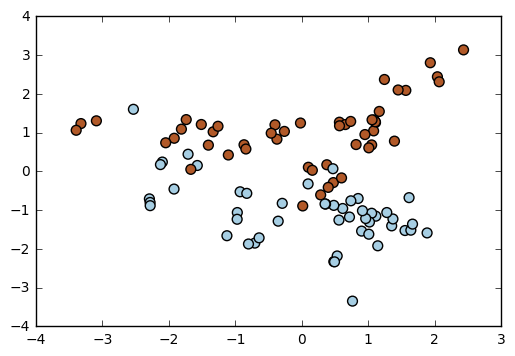

In [14]:
from sklearn.datasets import make_classification
X_art, y_art = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2)
mlutils.plot_2d_clf_problem(X_art, y_art)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNN()
knn.fit(X_art,y_art)

predict_ = list()
pogodaka = 0
for i in range(0,len(X_art)):
    predict_.append(knn.predict(X_art[i]))
    if predict_[-1] == y_art[i]:
        pogodaka = pogodaka + 1

print "tocnost = ", (pogodaka*1.0)/len(y_art)
print "predict = ", array(predict_)

#knnSklearn = NearestNeighbors(n_neighbors=3)
knnSklearn = KNeighborsClassifier(n_neighbors=3, algorithm = 'brute')
knnSklearn.fit(X_art,y_art)

predict = list()
pogodaka = 0
for i in range(0,len(X_art)):
    predict.append(knnSklearn.predict([X_art[i]]))
    if predict_[-1] == y_art[i]:
        pogodaka = pogodaka + 1

print "\ntocnostSklearn = ", (pogodaka*1.0)/len(y_art)

print "y = ", y_art

tocnost =  0.93
predict =  [0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1
 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1
 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]

tocnostSklearn =  0.5
y =  [0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1
 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0
 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0]


#### (c)

Pomoću funkcije `mlutils.plot_2d_clf_problem` iscrtajte prostor primjera i područja koja odgovaraju prvoj odnosno drugoj klasi. Eksperimentirajte s različitim vrijednostima za broj primjera $N$, broj susjeda $k$ i broj klasa $K$.

**NB:** Implementacija algoritma `KNeighborsClassifier` iz sklearna vjerojatno će raditi brže od Vaše implementacije, pa koristite nju za iscrtavanje grafa. Naime, za iscrtavanje grafa potrebno je napraviti predikciju za svaku točku u regiji iscrtavanja.

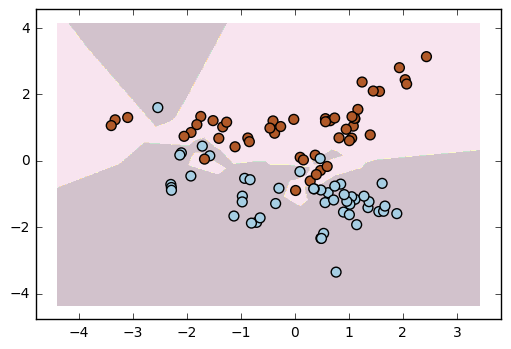

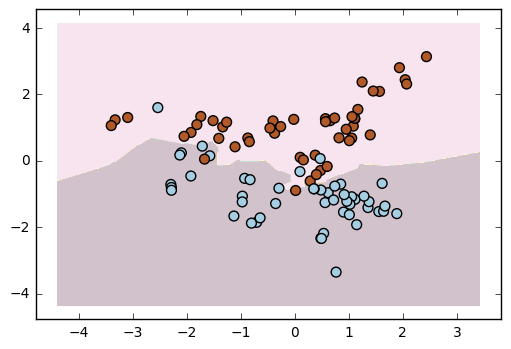

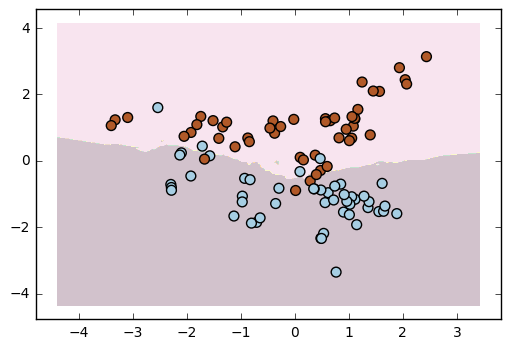

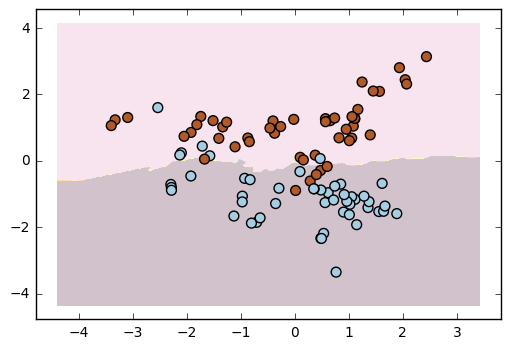

In [16]:
knnSklearn = KNeighborsClassifier(n_neighbors=1)
knnSklearn.fit(X_art,y_art)
mlutils.plot_2d_clf_problem(X_art, y_art, lambda x : knnSklearn.predict(x) == True)

plt.figure()
knnSklearn = KNeighborsClassifier(n_neighbors=3)
knnSklearn.fit(X_art,y_art)
mlutils.plot_2d_clf_problem(X_art, y_art, lambda x : knnSklearn.predict(x) == True)

plt.figure()
knnSklearn = KNeighborsClassifier(n_neighbors=10)
knnSklearn.fit(X_art,y_art)
mlutils.plot_2d_clf_problem(X_art, y_art, lambda x : knnSklearn.predict(x) == True)

plt.figure()
knnSklearn = KNeighborsClassifier(n_neighbors=20)
knnSklearn.fit(X_art,y_art)
mlutils.plot_2d_clf_problem(X_art, y_art, lambda x : knnSklearn.predict(x) == True)

**Q:** Kako $k$ utječe na izgled granice između klasa? A broj primjera $N$?

### 6. Analiza algoritma k-najbližih susjeda

Algoritam k-nn ima hiperparametar $k$ (broj susjeda). Taj hiperparametar izravno utječe na složenost algoritma, pa je stoga izrazito važno dobro odabrati njegovu vrijednost. Kao i kod mnogih drugih algoritama, tako i kod algoritma k-nn optimalna vrijednost hiperametra $k$ ovisi o konkretnom problemu, uključivo broju primjera $N$, broju značajki (dimenzija) $n$ te broju klasa $K$.

#### (a)

Kako bismo dobili pouzdanije rezultate, potrebno je mjerenja ponoviti na različitim skupovima podataka i zatim uprosječiti dobivene vrijednosti pogrešaka. Definirajte funkciju

> `knn_eval(n_instances=100, n_features=2, n_classes=2, n_informative=2, test_size=0.3, k_range=(1, 20), n_trials=100)`

koja trenira i ispituje model k-nn na ukupno `n_instances` primjera, i to tako da za svaku vrijednost hiperparametra iz zadanog intervala `k_range` ponovi `n_trials` mjerenja, generirajući za svako od njih nov skup podataka pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) i dijeleći ga na skup za učenje i skup za ispitivanje koristeći funkciju [`sklearn.cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html). Udio skupa za ispitivanje definiran je parametrom `test_size`. Vrijednosti parametara `n_instances`, `n_features`, `n_classes` i `n_informative` proslijedite funkciji `make_classification` te dodatno postavite `n_redundant=0` i `n_clusters_per_class=1`. Povratne vrijednosti funkcije jest trojka `(best_k, train_errors, test_errors)`. Vrijednost `best_k` je optimalna vrijednost hiperparametra $k$ (vrijednost za koju je pogreška na skupu za ispitivanje najmanja). Vrijednosti `train_errors` i `test_errors`  liste su pogrešaka na skupu za učenja odnosno skupu za testiranje za sve razmatrane vrijednosti hiperparametra $k$.

In [18]:
from sklearn.cross_validation import train_test_split

def knn_eval(n_instances, n_features=2, n_classes=2, n_informative=2, test_size=0.3, k_range=(1, 20), n_trials=100):
    
    train_errors = list()
    test_errors = list()
    
    best_k = 0
    minTestError = 10000
    
    for i in range(k_range[0],k_range[1]):
        train_errorsSuma = 0
        test_errorsSuma = 0
        for j in range(0,n_trials):
            X, y = make_classification(n_samples=n_instances, n_informative=n_informative, n_features=n_features, n_classes=n_classes, n_redundant=0, n_clusters_per_class=1)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=25)
            
            knnSklearn = KNeighborsClassifier(n_neighbors = i)   
            knnSklearn.fit(X_train,y_train)

            suma = 0
            for j in range(0, len(y_train)):
                yPred = knnSklearn.predict(X_train[j])
                suma = suma + (yPred - y_train[j])**2
            train_errorsSuma = train_errorsSuma + suma

            suma = 0
            for j in range(0, len(y_test)):
                yPred = knnSklearn.predict(X_test[j])
                suma = suma + (yPred - y_test[j])**2
            test_errorsSuma = test_errorsSuma + suma
        
        train_errors = train_errors + [ train_errorsSuma/(1.0*n_trials) ]
        test_errors = test_errors + [ test_errorsSuma/(1.0*n_trials) ]
        #print i, " "
        
        if ( test_errorsSuma/(1.0*n_trials) < minTestError ):
            best_k = i
            minTestError = test_errorsSuma/(1.0*n_trials)
        
        
    #best_k = test_errors.index(min(test_errors))
    
    return (best_k, train_errors, test_errors)

#### (b)

Pomoću funkcije `knn_eval` iz (a) dijela zadatka, iscrtajte pogrešku učenja i ispitivanja kao funkcije hiperparametra $k$, $k\in\{1,\dots,20\}$, za $N=200$ primjera. Ispišite i optimalnu vrijednost za $k$.

In [ ]:
best_k, train_errors, test_errors = knn_eval(n_instances=200, n_trials = 10, k_range=(1, 20))
print best_k, train_errors, test_errors
        
plt.plot(range(1,20),[train_errors])
plt.plot(range(1,20),[test_errors])


**Q:** Kojem području odgovara prenaučenost, a kojem podnaučenost modela? Zašto? <br>
**Q:** Je li uvijek moguće doseći pogrešku od 0 na skupu za učenje?

#### (c)

Pomoću funkcije `knn_eval` iz (a) dijela zadatka, iscrtajte pogreške učenja i ispitivanja kao funkcije hiperparametra $k$, $k\in\{1,\dots,20\}$, za $N=\{100, 500, 1000, 3000\}$ primjera. Načinite 4 zasebna grafikona (generirajte ih u 2x2 polju). U svakoj iteraciji ispišite optimalnu vrijednost hiperparametra $k$ (najlakše kao naslov grafikona).

In [ ]:
for i in [100,500,1000,3000]:
    print i
    best_k, train_errors, test_errors = knn_eval(n_instances=i, n_trials = 5, k_range=(1, 20))
    print best_k
    plt.figure()
    plt.plot(range(1,20),train_errors)
    plt.plot(range(1,20),test_errors)

### 7. Nerobusnost algoritma k-nn

Svrha ovog zadatka jest analizirati u kojoj je mjeri algoritam k-nn osjetljiv na razlike u mjernoj skali između pojedinih dimenzija te na prisutnost nebitnih značajki.

#### (a)

Krenite od umjetnog skupa podataka danog u nastavku. Zatim napravite kopiju tog skupa podataka (pogledajte [`copy.deepcopy`](https://docs.python.org/2/library/copy.html#copy.deepcopy)) i preinačite ju tako da jednu dimenziju pomnožite sa 100. Oba skupa podijelite na skup za učenje i skup za ispitivanje u omjeru 7:3, pri čemu obratite pozornost na to da oba skupa podijelite na identičan način. Trenirajte modele k-nn na skaliranoj i neskaliranoj inačici skupa za učenje (s pretpostavljenim parametrima), a zatim ispitajte model na odgovarajućim ispitnim inačicama skupova.

**Q:** Zašto je ovaj problem tako izražen kod algoritma k-nn?

#### (b)

Kako bismo provjerili u kojoj je mjeri algoritam k-nn osjetljiv na prisustvo nebitnih značajki, možemo iskoristiti funkciju `make_classification` kako bismo generirali skup primjera kojemu su neke od značajki nebitne. Naime, parametar `n_informative` određuje broj bitnih značajki, dok parametar `n_features` određuje ukupan broj značajki. Ako je `n_features > n_informative`, onda će neke od značajki biti nebitne. Umjesto da izravno upotrijebimo funkciju `make_classification`, upotrijebit ćemo funkciju `knn_eval` iz zadatka (7a), jer ćemo na taj način dobiti pouzdanije procjene.

Koristite funkciju `knn_eval` na dva načina. U oba koristite $N=1000$ primjera, $n=10$ značajki i $K=5$ klasa, ali za prvi neka su svih 10 značajki bitne, a za drugi neka je bitno samo 5 od 10 značajki. Ispišite pogreške učenja i ispitivanja za oba modela za optimalnu vrijednost $k$ (vrijednost za koju je ispitna pogreška najmanja).

**Q:** Zašto nebitne značajke ovoliko utječu na perfomanse modela?